#### Calculating The Principal Components

In [ ]:
#1 - Scale the dataframe features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = scaler.fit_transform(df)

In [ ]:
#2 - Create the PCA instance and apply to scaled dataframe

from sklearn.decomposition import PCA

pca = PCA()
print(pca.fit_transform(std_df))

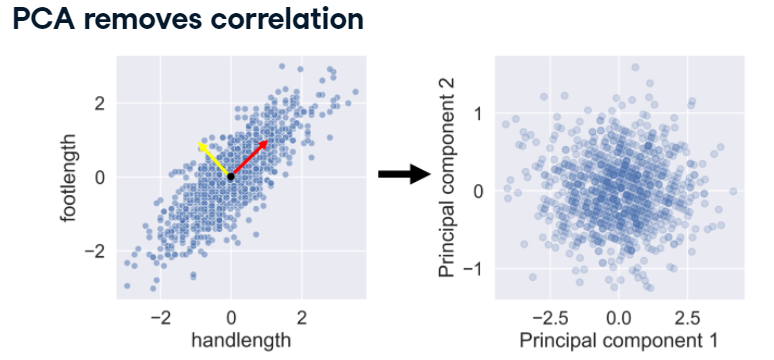

ie. no more duplicate information

#### Principal component explained variance ratio

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(std_df)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
#which components contribute what amount of variance ratio

You must decide how much variance you're willing to sacrifice in the dataset.

**down-side** the remaining components might be hard to interpret

##### .components_attribute

- Examining this tells us:
    - the extent each component's vector is affected by a particular attribute
    - features that have the biggest positive or negative effects on a component can then be used to add a meaning to that component.

In [ ]:
print(pca.components_)

#### PCA and Categorical Data

- PCA is not a preferred algorithm to reduce the dimensionality of categorical datasets but we can check they align with the most important sources of variance in the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([  #2 tuples inside a list
    ('scaler', StandardScaler()),
    ('reducer', PCA())])

#fit and transform
pc = pipe.fit_transform(df)

##### Checking for the effect of categorical features

In [ ]:
#defining the first two principal components
df['PC1'] = pc[:, 0]
df['PC2'] = pc[:, 1]

sns.scatterplot(data=df, x='PC1', y='PC2',
               hue='categorical_column', #adding in a categorical value allows for the visualization
                #of the effect of the categorical column data on the distribution of the PC1/PC2
               alpha=0.4)

Examples:

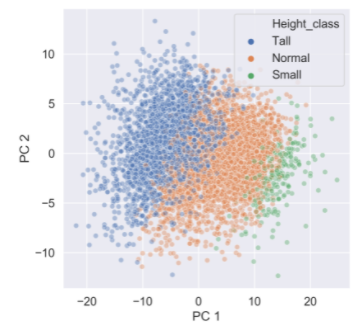

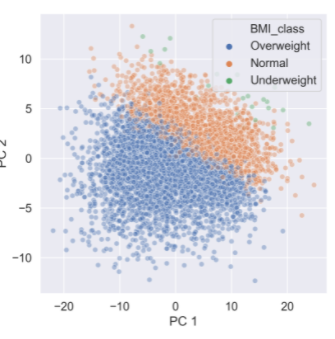

In [ ]:
pipe = Pipeline([  #2 tuples inside a list
    ('scaler', StandardScaler()),
    ('reducer', PCA()),
    ('classifier', RandomForestClassifier) #adding a RandomForestClassifier
])

pipe.fit(X_train, y_train)
print(pipe.steps[1])

In [ ]:
pipe.steps[1][1].explained_variance_ratio_.cumsum()
print(pipe.score(X_test, y_test))

#### Setting an Explained Variance Threshold

In [ ]:
pipe = Pipeline([  #2 tuples inside a list
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.9))])  #the selected components explain 90% of variance

pipe.fit(df)
print(len(pipe.steps[1][1].components_))

The problem is still an unanswered question: "How many components to keep?"  Since this process is still an arbitrary one, its still an unsolved question.  Plus, "how much information are you willing to reduce complexity?" 

#### Optimal Number | Elbow Method

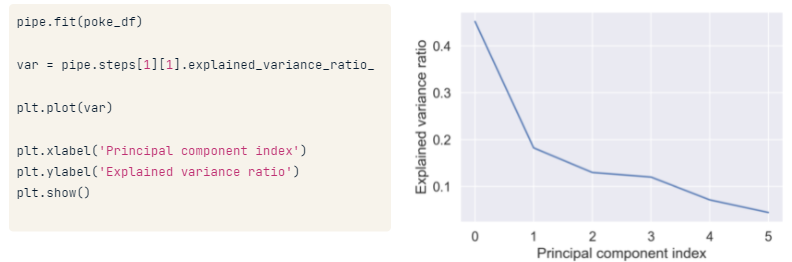

index is 1, but the selection is 2 components

#### PCA Operations

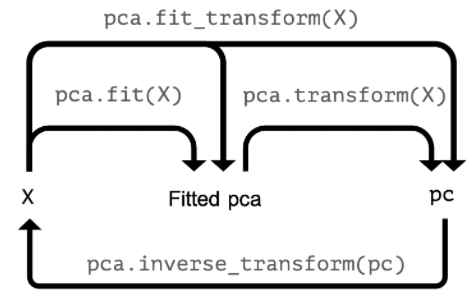

Inverse direction has the most impact on image compression.